In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
from alpha_vantage.techindicators import TechIndicators
from utils import *
from sklearn.preprocessing import MinMaxScaler

#### Obtain price data and technical indicators

<AxesSubplot:xlabel='Date'>

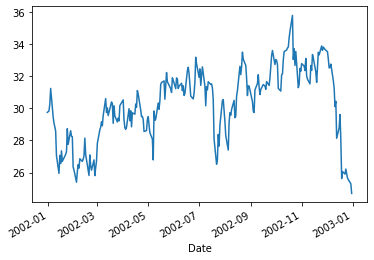

In [19]:
start_date = datetime.datetime(2002, 1, 1)
end_date = datetime.datetime(2003, 1, 1)

ticker = "EA"

history = yf.Ticker(ticker).history(start=start_date, end=end_date)
history["Close"].plot()

In [20]:
history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2001-12-31,30.709414,30.709414,29.667409,29.746799,3140400,0,0
2002-01-02,30.014745,30.138793,29.578094,29.831152,5836200,0,0
2002-01-03,29.865888,30.575445,29.702145,30.257881,3497400,0,0
2002-01-04,30.793772,31.607529,30.471245,31.240345,4256400,0,0
2002-01-07,30.381925,30.828500,29.454044,29.478853,8307400,0,0
...,...,...,...,...,...,...,...
2002-12-24,25.767329,26.462000,25.717710,26.213903,4556400,0,0
2002-12-26,26.367722,26.486809,25.449765,25.648241,5596800,0,0
2002-12-27,25.573815,26.174208,25.459690,25.553967,5055200,0,0


In [57]:
def get_sma(data, intervals):   
    num_intervals = intervals[-1] - intervals[0] + 1
    sma = np.zeros((len(data), num_intervals))
    
    for col in range(num_intervals):
        # initial sum
        sum = np.sum(data[:intervals[col]])
        
        # fill in the table
        for row in range(intervals[col] - 1, len(data)):
            sma[row, col] = sum / intervals[col]
            sum -= data[row - intervals[col]]
            sum += data[row]
            
    return sma

In [67]:
data = history['Close'].to_numpy()
intervals = np.arange(6, 21)

sma = get_sma(data, intervals)
sma_df = pd.DataFrame(sma)
sma_df.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,29.938662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,30.668893,29.782951,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,30.519208,30.376257,29.632055,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,30.309980,30.208969,30.117084,29.344332,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,29.774090,29.810596,29.779052,29.605109,29.004494,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
intervals = np.arange(6, 21)

sma = get_sma(ticker, intervals, start_date, end_date)
ema = get_ema(ticker, intervals, start_date, end_date)
wma = get_wma(ticker, intervals, start_date, end_date)
t3 = get_t3(ticker, intervals, start_date, end_date)
rsi = get_rsi(ticker, intervals, start_date, end_date)
willr = get_willr(ticker, intervals, start_date, end_date)
adx = get_adx(ticker, intervals, start_date, end_date)
mom = get_mom(ticker, intervals, start_date, end_date)
cci = get_cci(ticker, intervals, start_date, end_date)
cmo = get_cmo(ticker, intervals, start_date, end_date)
roc = get_roc(ticker, intervals, start_date, end_date)
mfi = get_mfi(ticker, intervals, start_date, end_date)
trix = get_trix(ticker, intervals, start_date, end_date)
dx = get_dx(ticker, intervals, start_date, end_date)
trima = get_trima(ticker, intervals, start_date, end_date)

--- Obtaining SMA ---
--- Obtaining EMA ---
--- Obtaining WMA ---
--- Obtaining T3 ---
--- Obtaining RSI ---
--- Obtaining WILLR ---


In [ ]:
df = pd.concat([history, ema, sma, wma, trima, t3, rsi, willr, adx, mom, cci, cmo, roc, mfi, trix, dx], axis=1)
df = df.dropna()
df = df.drop(["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"], axis=1)
df = df.rename(columns={"Close": "close"})
df.to_csv("EA_15.csv", index_label="date")

#### Read data and create labels

In [ ]:
df = pd.read_csv("EA_15.csv")
df = df.set_index("date")
df.index = pd.to_datetime(df.index)
df

In [ ]:
df.describe()

In [ ]:
num_features = len(df.columns) - 1
shape = (int(np.sqrt(num_features)), int(np.sqrt(num_features)))

In [ ]:
labels = create_labels(df, window_size=3)

In [ ]:
print(f"Sell {sum(labels == 0)}")
print(f"Buy {sum(labels == 1)}")
print(f"Hold {sum(labels == 2)}")

In [ ]:
minmax = MinMaxScaler(feature_range=(0, 1))

x = np.array(df.loc[:, "ema_6":"dx_20"])
x_norm = minmax.fit_transform(x)
x_reshaped = reshape_data(x_norm, shape[0], shape[1])

In [ ]:
w = 10
h = 10

fig = plt.figure(figsize=(w, h))
for i in range(1, 7):
    fig.add_subplot(3, 2, i)
    img = x_reshaped[i+400]
    plt.title(f"x_{i+400}")
    plt.imshow(img, cmap="binary")

plt.show()